# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [43]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19248368,
            "id": 1,
            "last_updated": 1672504144,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 319365027415,
                    "percent_change_1h": 0.0336209250202979,
                    "percent_change_24h": 0.490061975147781,
                    "percent_change_7d": -1.08656252305682,
                    "percentage_change_1h": 0.0336209250202979,
                    "percentage_change_24h": 0.490061975147781,
                    "percentage_change_7d": -1.08656252305682,
                    "price": 16609.01,
                    "volume_24h": 13787138571
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19248368,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120525374,
            "id": 1027,
            "last_updated": 1672504170,
            "max_supply": 120525374,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 144890206253,
                    "percent_change_1h": -0.065477472816587,
                    "percent_change_24h": 0.845591441363121,
                    "percent_change_7d": -1.39966644131649,
                    "percentage_change_1h": -0.065477472816587,
                    "percentage_change_24h": 0.845591441363121,
                    "percentage_change_7d": -1.39966644131649,
                    "price": 1203.62,
                    "volume_24h": 3079260824
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120525374,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_c

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
btc_price


16609.01

In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price


1203.62

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
btc_value


19930.811999999998

In [11]:
# Compute the current value of the ETH holding 
eth_value =eth_price * eth_coins

# Print current value of your holding in ETH
eth_value


6379.185999999999

In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


26309.997999999996

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-12-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-12-30", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-12-30 05:00:00+00:00  380.64  382.58  378.43  382.43  83474793   

                                                     AGG                  \
                          trade_count        vwap   open   high      low   
timestamp                                                                  
2022-12-30 05:00:00+00:00      544591  381.220108  97.25  97.36  96.9741   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2022-12-30 05:00:00+00:00  96.99  8460107       29791  97.066805

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio['AGG']['close'])

# Print the AGG closing price
agg_close_price


96.99

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio['SPY']['close'])

# Print the SPY closing price
spy_close_price


382.43

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


19398.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value


42067.3

In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


61465.3

In [25]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print portfolio balance balance
total_portfolio


87775.298

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [27]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[26309.997999999996, 61465.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [29]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns = ['amount'], index = ['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,26309.998
stock/bond,61465.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

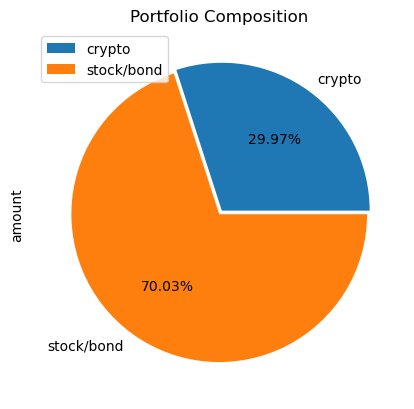

In [82]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title = 'Portfolio Composition', y ='amount', autopct = '%1.2f%%', explode = [0.03,0])

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [83]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income 


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [84]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print(f'Congratulations, you have sufficient reserves (${total_portfolio: .0f} vs. the threshold of ${emergency_fund_value: .0f}) for an emergency fund')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations, you just qualified for an emergency fund (your portfolio value of ${total_portfolio: .0f} is equal to the emergency fund threshold: ${emergency_fund_value: .0f})')
else:
    print(f'Unfortunately, you do not qualify for an emergency fund (you are ${(emergency_fund_value - total_portfolio): .0f} away for having sufficient funds)')


Congratulations, you have sufficient reserves ($ 87775 vs. the threshold of $ 36000) for an emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [89]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-12-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-12-30", tz="America/New_York").isoformat()

In [93]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df_retire = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
SPY = prices_df_retire[prices_df_retire['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df_retire[prices_df_retire['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df_retire = pd.concat([SPY,AGG],axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
display(prices_df_retire.head())
display(prices_df_retire.tail())

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-12-30 05:00:00+00:00  322.95  323.10  320.55  321.13  49782805   
2019-12-31 05:00:00+00:00  320.53  322.13  320.15  321.85  57173534   
2020-01-02 05:00:00+00:00  323.54  324.89  322.53  324.87  59253833   
2020-01-03 05:00:00+00:00  321.16  323.64  321.10  322.43  77783121   
2020-01-06 05:00:00+00:00  320.49  323.73  320.36  323.73  55817168   

                                                      SPY                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-12-30 05:00:00+00:00      245064  321.464803  112.42  112.645  112.3400   
2019-12-31 05:00:00+00:00      212945  321.379997  112.54  112.540  112.3650   
2020-01-02 05:00:00+00:00      304884  323.710023  112.68  112.800  112.5600   
2020-01-03 05:00:00+00:00      358500  322.791701  112.89  113.050  112.7814   
2020-01-06 05:00:00+00:00      255767  322.722391  113.13  113.130  112.8400   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-12-30 05:00:00+00:00  112.63  3979209       11922  112.529642  
2019-12-31 05:00:00+00:00  112.37  6807706       19647  112.410957  
2020-01-02 05:00:00+00:00  112.68  6791537       17763  112.645004  
2020-01-03 05:00:00+00:00  113.01  3664283       14453  112.958798  
2020-01-06 05:00:00+00:00  112.92  8131608       17277  112.949600

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-12-23 05:00:00+00:00  379.65  383.06  378.03  382.91  58757557   
2022-12-27 05:00:00+00:00  382.79  383.15  379.65  381.40  51494435   
2022-12-28 05:00:00+00:00  381.33  383.39  376.42  376.66  70660057   
2022-12-29 05:00:00+00:00  379.63  384.35  379.08  383.44  64517045   
2022-12-30 05:00:00+00:00  380.64  382.58  378.43  382.43  83474793   

                                                     SPY                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2022-12-23 05:00:00+00:00      441157  381.501493  98.05  98.110  97.8950   
2022-12-27 05:00:00+00:00      427772  381.776690  97.46  97.615  97.2121   
2022-12-28 05:00:00+00:00      500857  379.062108  97.47  97.500  97.0800   
2022-12-29 05:00:00+00:00      480519  382.399055  97.21  97.470  97.1825   
2022-12-30 05:00:00+00:00      544591  381.220108  97.25  97.360  96.9741   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-12-23 05:00:00+00:00  97.97   4761697       17054  97.980418  
2022-12-27 05:00:00+00:00  97.26   7922269       28214  97.353687  
2022-12-28 05:00:00+00:00  97.09  12129529       25595  97.269523  
2022-12-29 05:00:00+00:00  97.45   7475702       21522  97.335261  
2022-12-30 05:00:00+00:00  96.99   8460107       29791  97.066805

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [95]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30year = MCSimulation(
    portfolio_data = prices_df_retire,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data
MC_30year.portfolio_data.head()


AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-12-30 05:00:00+00:00  322.95  323.10  320.55  321.13  49782805   
2019-12-31 05:00:00+00:00  320.53  322.13  320.15  321.85  57173534   
2020-01-02 05:00:00+00:00  323.54  324.89  322.53  324.87  59253833   
2020-01-03 05:00:00+00:00  321.16  323.64  321.10  322.43  77783121   
2020-01-06 05:00:00+00:00  320.49  323.73  320.36  323.73  55817168   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-12-30 05:00:00+00:00      245064  321.464803          NaN  112.42   
2019-12-31 05:00:00+00:00      212945  321.379997     0.002242  112.54   
2020-01-02 05:00:00+00:00      304884  323.710023     0.009383  112.68   
2020-01-03 05:00:00+00:00      358500  322.791701    -0.007511  112.89   
2020-01-06 05:00:00+00:00      255767  322.722391     0.004032  113.13   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-12-30 05:00:00+00:00  112.645  112.3400  112.63  3979209       11922   
2019-12-31 05:00:00+00:00  112.540  112.3650  112.37  6807706       19647   
2020-01-02 05:00:00+00:00  112.800  112.5600  112.68  6791537       17763   
2020-01-03 05:00:00+00:00  113.050  112.7814  113.01  3664283       14453   
2020-01-06 05:00:00+00:00  113.130  112.8400  112.92  8131608       17277   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-12-30 05:00:00+00:00  112.529642          NaN  
2019-12-31 05:00:00+00:00  112.410957    -0.002308  
2020-01-02 05:00:00+00:00  112.645004     0.002759  
2020-01-03 05:00:00+00:00  112.958798     0.002929  
2020-01-06 05:00:00+00:00  112.949600    -0.000796

In [96]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 110.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 120.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 130.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 140.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 150.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 160.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 170.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 180.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 190.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 200.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 210.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 220.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 230.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 240.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 250.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 260.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 270.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 280.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 290.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 300.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 310.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 320.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 330.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 340.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 350.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 360.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 370.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 380.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 390.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 400.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 410.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 420.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 430.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 440.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 450.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 460.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 470.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 480.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 490.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989240,1.004689,1.007873,1.005153,1.001248,1.013629,1.000920,0.990295,1.010372,0.997017,...,1.003206,0.983548,0.997291,1.015828,1.002920,1.000293,0.995698,1.006764,1.000644,0.997979
2,0.981554,1.006786,1.006860,1.004284,1.010308,1.012705,0.996614,0.995983,1.009469,1.001321,...,0.994837,0.982186,0.990430,1.013691,1.019888,1.005466,0.987180,1.012909,0.983172,0.995662
3,0.975084,1.011295,1.011197,1.000328,1.004210,1.007840,1.002213,1.003898,1.011533,1.003271,...,1.001683,0.988134,0.989416,1.016626,1.017121,0.995139,0.975139,1.008156,0.978409,1.001416
4,0.985180,1.005860,1.011539,0.997504,1.006900,1.009174,1.011100,1.007044,1.007735,0.997504,...,1.006520,0.974853,0.985455,1.018814,1.020680,0.987435,0.968615,1.009513,0.974097,1.009858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.694237,0.449830,1.426147,1.962116,0.553186,0.401484,0.401908,0.896224,3.017604,0.855897,...,0.966861,0.829820,0.633821,1.721143,1.557318,0.451237,0.659549,2.385135,0.753705,6.667621
7557,0.697251,0.452498,1.430006,1.958360,0.545026,0.398107,0.398326,0.885833,3.004098,0.850870,...,0.968991,0.826657,0.631725,1.737227,1.567985,0.451308,0.663943,2.391099,0.741086,6.655081
7558,0.698625,0.451682,1.435583,1.949430,0.545957,0.396271,0.398094,0.886396,2.988280,0.842903,...,0.961927,0.819423,0.634913,1.743935,1.577834,0.449844,0.666135,2.407407,0.746126,6.632811
7559,0.701923,0.447438,1.439790,1.966492,0.549843,0.398994,0.396948,0.882813,2.953605,0.841524,...,0.964055,0.820485,0.638169,1.743396,1.586738,0.451164,0.665531,2.416277,0.743173,6.718551


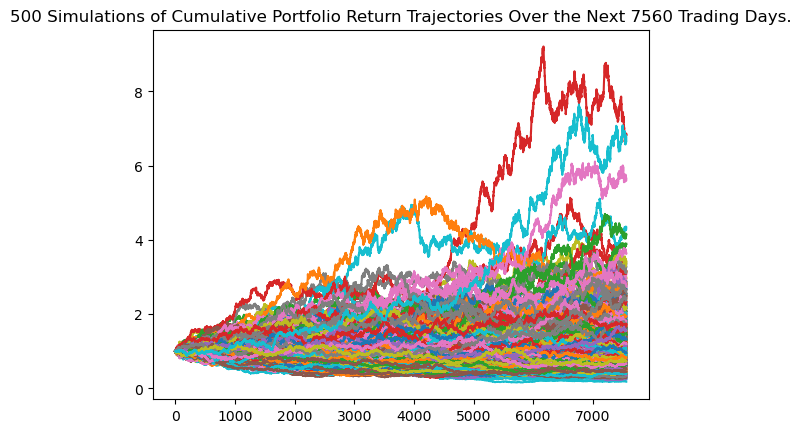

In [97]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_30year.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

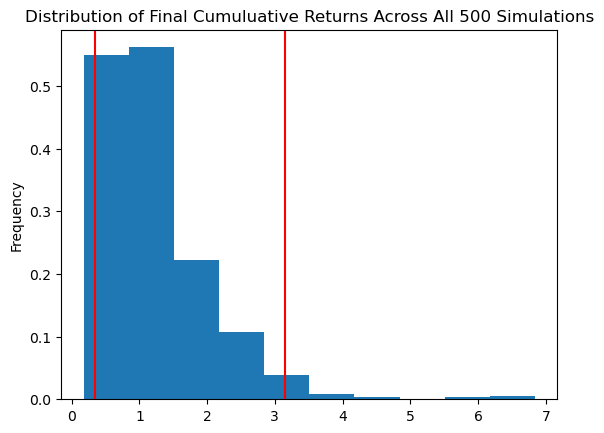

In [98]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_30year.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [99]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_30year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              1.258741
std               0.807786
min               0.181776
25%               0.726324
50%               1.059331
75%               1.535734
max               6.837938
95% CI Lower      0.346133
95% CI Upper      3.152552
Name: 7560, dtype: float64


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [102]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


61465.3

In [113]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 30 years will end within the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")




There is a 95% chance that an initial investment of $61465.3 in the portfolio over the next 30 years will end within the range of $ 21275.15 and $ 193772.58.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [104]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10year = MCSimulation(
    portfolio_data = prices_df_retire,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data
MC_10year.portfolio_data.head()

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-12-30 05:00:00+00:00  322.95  323.10  320.55  321.13  49782805   
2019-12-31 05:00:00+00:00  320.53  322.13  320.15  321.85  57173534   
2020-01-02 05:00:00+00:00  323.54  324.89  322.53  324.87  59253833   
2020-01-03 05:00:00+00:00  321.16  323.64  321.10  322.43  77783121   
2020-01-06 05:00:00+00:00  320.49  323.73  320.36  323.73  55817168   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-12-30 05:00:00+00:00      245064  321.464803          NaN  112.42   
2019-12-31 05:00:00+00:00      212945  321.379997     0.002242  112.54   
2020-01-02 05:00:00+00:00      304884  323.710023     0.009383  112.68   
2020-01-03 05:00:00+00:00      358500  322.791701    -0.007511  112.89   
2020-01-06 05:00:00+00:00      255767  322.722391     0.004032  113.13   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-12-30 05:00:00+00:00  112.645  112.3400  112.63  3979209       11922   
2019-12-31 05:00:00+00:00  112.540  112.3650  112.37  6807706       19647   
2020-01-02 05:00:00+00:00  112.800  112.5600  112.68  6791537       17763   
2020-01-03 05:00:00+00:00  113.050  112.7814  113.01  3664283       14453   
2020-01-06 05:00:00+00:00  113.130  112.8400  112.92  8131608       17277   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-12-30 05:00:00+00:00  112.529642          NaN  
2019-12-31 05:00:00+00:00  112.410957    -0.002308  
2020-01-02 05:00:00+00:00  112.645004     0.002759  
2020-01-03 05:00:00+00:00  112.958798     0.002929  
2020-01-06 05:00:00+00:00  112.949600    -0.000796

In [105]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 110.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 120.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 130.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 140.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 150.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 160.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 170.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 180.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 190.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 200.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 210.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 220.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 230.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 240.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 250.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 260.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 270.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 280.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 290.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 300.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 310.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 320.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 330.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 340.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 350.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 360.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 370.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 380.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 390.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 400.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 410.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 420.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 430.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 440.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 450.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 460.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 470.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 480.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

Running Monte Carlo simulation number 490.


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999638,1.002350,1.002184,1.003344,1.003493,0.998558,1.000437,0.996172,0.992285,1.004615,...,0.998017,0.991693,0.999490,0.998816,0.997136,1.003756,0.999949,1.000582,1.001228,1.004068
2,0.999968,1.004445,0.999882,1.003987,1.002957,0.995608,1.000523,0.991516,0.983376,1.000027,...,0.992003,0.995064,0.989931,1.002729,0.991662,1.009179,0.997602,1.006371,1.005970,1.008443
3,0.997682,0.998151,1.001785,1.004362,1.000990,0.997156,1.000172,0.990720,0.983272,1.001104,...,0.998875,0.984068,0.991633,1.000290,0.989932,1.004635,0.998849,1.008583,1.003453,1.008135
4,0.995033,0.989778,0.996247,1.004743,0.995200,0.997091,0.996356,0.995333,0.991740,0.997975,...,0.995662,0.981487,0.990648,1.003886,0.988522,1.005763,1.004896,1.005016,1.008289,1.016478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.943520,0.803339,0.622826,0.793943,0.653903,0.792227,1.052761,0.666879,0.593761,0.604095,...,1.020170,0.537493,1.147749,0.954245,0.620674,1.240629,0.812380,0.968868,0.905218,0.570196
2517,0.936555,0.806954,0.625932,0.794279,0.654030,0.789834,1.046998,0.672451,0.595329,0.599045,...,1.009670,0.540762,1.152139,0.950007,0.620864,1.239435,0.810436,0.971112,0.899290,0.565821
2518,0.937186,0.804264,0.621656,0.799325,0.650836,0.788588,1.034651,0.669339,0.595560,0.604170,...,1.003882,0.537559,1.153725,0.953623,0.617546,1.239691,0.809728,0.967728,0.898583,0.565528
2519,0.933044,0.805274,0.624330,0.797583,0.646852,0.788751,1.037970,0.671356,0.591007,0.605379,...,1.000054,0.539441,1.140356,0.951391,0.615275,1.243309,0.808678,0.971989,0.894353,0.568879


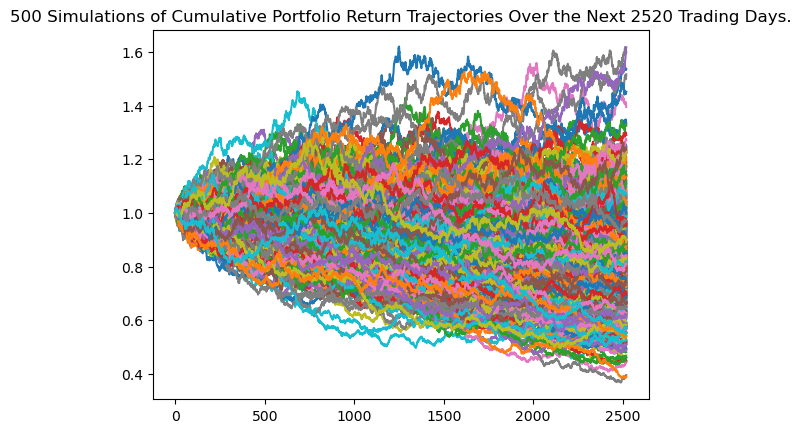

In [106]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_10y = MC_10year.plot_simulation()

# Save the plot for future use
MC_sim_line_plot_10y.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")



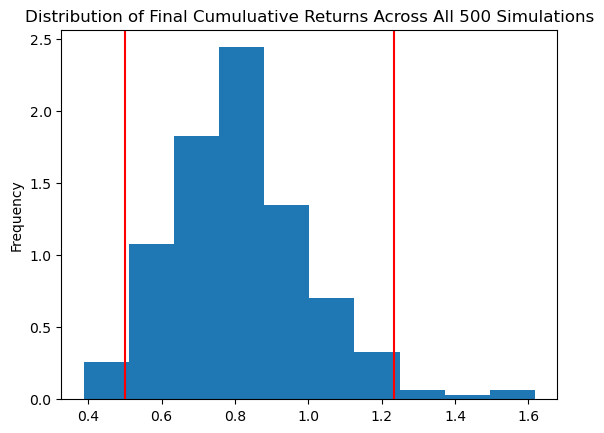

In [107]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_10y = MC_10year.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot_10y.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [108]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_10y = MC_10year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_10y)

count           500.000000
mean              0.815638
std               0.190814
min               0.388503
25%               0.685109
50%               0.799828
75%               0.926036
max               1.617474
95% CI Lower      0.501006
95% CI Upper      1.234109
Name: 2520, dtype: float64


C:\Users\boris\OneDrive\Documents\Studies\ColumbiaBootCamp\FinTech-Workspace\Module_5\Challenge_5\Starter_Code\FinTech_Module5_Financial_Planner\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [109]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds

61465.3

In [112]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_10y[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics_10y[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 10 years will end within the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $61465.3 in the portfolio over the next 10 years will end within the range of $ 30794.50 and $ 75854.86.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

## Part 2 conclusion:
By allocating a higher weight to the riskier assets we also increased the riskiness of the portfolio, which can be seen by looking at the standard deviation of the 10y vs 30y returns (0.81 vs 0.19). However, the mean of the 10y portfolio is only 0.81 compared to the 30y mean of 1.26.
Considering a mean below 1 and the range of the outcomes with the 95% confidence (please see below in the summary statistics), the higher allocation to SPY does not improve the portfolio performance (for the 10y simulation) and should not be advised. ***It actually suggests an increasing probablility  of union memebers ending up with negative returns over the next 10 years.***

### Important to consider:
When examining the 10y and 30y simulation outcomes we need to take into account that:
 - we simulated 10y and 30y data based on only 3y of historical observations. This will largely distort the simulation results due to insufficient historical data (ideally, we should have an amount of historical data equvivalent to the forcasted data).
 - the last 3 years were unprecedented in terms of the market performance and this period can not serve as a good basis for long into the future simulations: 
  >> - the chosen historical period is covering the pandemic (sharp drop in stock prices and flight to safety - bonds), 
  >> - very large increase in the money supply (steep increase in bond prices followed by sharp rise in the stock market), 
  >> - subsequent market opening and increase in consumer demand combined with supply chain problems, previous huge money injection into the economy and war in Ukrain (infltion followed by hiking interest rates - drop in the bond and stock prices).
  
**Therefore, it would be strongly recommended not to rely on the past 3 years of history and instead getting a much longer histroical data set for simulating so far into the future.**

### Smmary statistics:

30Y statistics:<br/>
![30y_stats](images/30Y_Stats.png)
> There is a 95% chance that an initial investment of USD 61,465 in the portfolio over the next 30 years will end within in the range of USD 21,275 and USD 193,772.

10y statistics:<br/>
![10y_stats](images/10Y_Stats.png)
> There is a 95% chance that an initial investment of USD 61,465 in the portfolio over the next 10 years will end within in the range of USD 30,794 and USD 75,854.
